# Intermediate Network Analysis in Python

Build on your knowledge and skills to tackle more advanced problems in network analytics! Gain the conceptual and practical skills to analyze evolving time series of networks, learn about bipartite graphs, and how to use bipartite graphs in product recommendation systems. You'll also learn about graph projections, why they're so useful in Data Science, and figure out the best ways to store and load graph data from files. You'll consolidate all of this knowledge in a final chapter case study, in which you'll analyze a forum dataset.

## Chapter 1: Bipartite graphs & product recommendation systems
Learn about bipartite graphs and how they are used in recommendation systems. You will explore the GitHub dataset from the previous course, this time analyzing the underlying bipartite graph that was used to create the graph that you used earlier. Finally, you will get a chance to build the basic components of a recommendation system using the GitHub data!

### Defintions & basic recap
* Eric Ma: computation biological engineer from MIT (course instructor)

* **Network** = **Graph** = (nodes/edges)
    * A network, which is also known as a graph, is comprised of two sets: a set of nodes, and a set of edges
    * We often draw graphs as "circles joined by lines," where the circles represent some real world entity, such as individuals in a social network, and the lines denote some relationship between the entities, such as being connected as friends in a social network.
* **Directed** or **Undirected**
    * Facebook: Undirected (no direction is implied in "friendship")
    * Twitter: Directed (directional "Follow")
* **`networkx`**: API for analysis of graphs
    * contains a library of classes and functions for the creation, analysis, and manipulation of graphs
    
* Using `len(G.nodes())` and `len(G.edges())`, we can start describing a graph's basic statistics.
* Graph types include: `Graph`, `DiGraph`, `MultiGraph`, and `MultiDiGraph`

#### Network visualization
* **`nxviz`:** API for creating beautiful and rational graph viz
* **Rational** visualizations prioritize the nodes' placement; examples:
    * matrix
    * arc
    * circos
    * hive
    

In [43]:
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt
from collections import defaultdict

```
ap = nv.ArcPlot(G)
ap.draw()
plt.show()
```

**Add the degree centrality score of each node to their metadata dictionary:**
```
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(G)
for n in G.nodes():
    G.nodes[n]['centrality'] = dcs[n]
```

#### Plotting using nxviz

```
# Create the CircosPlot object: c
c = CircosPlot(G, node_color='bipartite', node_grouping='bipartite', node_order='centrality')

# Draw c to the screen
c.draw()

# Display the plot
plt.show()
```

### Bipartite graphs
* There are two conditions for defining a **bipartite graph**:
    * **A graph in which the nodes are partitioned into two sets.**
    * **The nodes in one set cannot be connected to one another; they can only be connected to nodes in the other set.**
* This is in contrast to the **unipartite** graphs we've been using thus far in the course, in which the nodes are not explicitly partitioned into two sets.
* An example where a bipartite graph may come in handy is: modeling the purchases that a set of customers make
    * The nodes are partitioned into two sets: the customers partition, and the products partition
    * Edges denote that a customer has purchased a particular product.
    * Customers cannot purchase other customers, products cannot be purchased by other products.

In [2]:
# import networks as nx
G= nx.Graph()
numbers = range(3)
G.add_nodes_from(numbers, bipartite='customers')
letters = ['a', 'b']
G.add_nodes_from(letters, bipartite='products')

* Though it is not required by the API, by convention, bipartite information is encoded as part of the node attributes (or metadata), using the `bipartite` keyword.
* In the toy example above, let's say we're modeling the connectivity between a 'customers' and a 'products' partition.
* In constructing the graph, we use the graph object's method `add_nodes_from()`, passing in the list of nodes from each partition as the first argument
* By passing in the `bipartite='customers'` or `bipartite='products'` arguments, the method will automatically create the node's metadata dictionary with the key bipartite and the value product or customers. 

In [3]:
G.nodes(data=True)

NodeDataView({0: {'bipartite': 'customers'}, 1: {'bipartite': 'customers'}, 2: {'bipartite': 'customers'}, 'a': {'bipartite': 'products'}, 'b': {'bipartite': 'products'}})

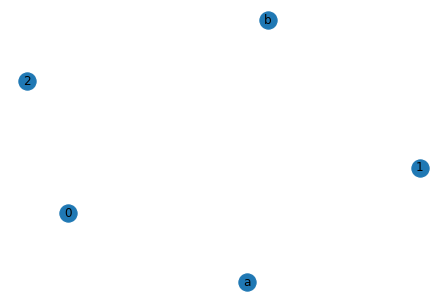

In [4]:
nx.draw(G, with_labels =True)
plt.show()

In [5]:
G.add_edge(0, 'b')
G.add_edge(1, 'b')
G.add_edge(2, 'a')
G.add_edge(2, 'b')

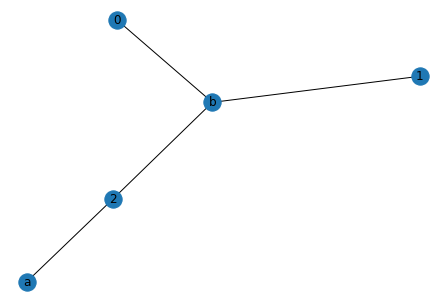

In [6]:
nx.draw(G, with_labels =True)
plt.show()

* **Note:** the partition info stored and displayed in metadata above.

#### Degree Centrality
* **Recall** that the degree centrality metric is a measure of node importance.
* For any graph, the degree centrality of a node in the graph is defined as the number of neighbors in the graph divided by the number of possible neighbors it could have
    * **(number of neighbors) // (number of possible neighbors)**
    
* **Number of possible neighbors *depends on graph type***
    * In a **bipartite** graph, the denominator is the number of nodes present in the *other* partition.


#### Filtering graphs
* Because NetworkX doesn't provide an explicit 'bipartite' graph class, you will need to learn how to filter a graph for the node set.
* This is most commonly accomplisheed by using list comprehensions
* For example, to get the nodes in the `'customers'` partition, use the list comprehension below:

In [7]:
cust_nodes = [n for n, d in G.nodes(data=True) if d['bipartite']=='customers']

In [8]:
cust_nodes

[0, 1, 2]

* Note how there's only `'customer'` nodes contained in the above list. 
* Upcoming in the course: we can get the bipartite degree centrality of a graph by calling on the bipartite degree centrality function, which requires a graph G and a list of nodes from one partition as arguments (it can be either partition.

In [9]:
nx.bipartite.degree_centrality(G, cust_nodes)

{0: 0.5, 1: 0.5, 2: 1.0, 'b': 1.0, 'a': 0.3333333333333333}

#### The 'bipartite' keyword
* This keyword is part of a node's metadata dictionary, and can be assigned both when you add a node and after the node is added. 
* Write a function that returns the nodes from a given partition in a bipartite graph.

In [10]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.nodes[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

```
# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G, 'users')))
```

#### Degree centrality distribution of user nodes
* The "degree centrality" is a measure of node importance 
* The "degree centrality distribution" is the list of degree centrality scores for all nodes in the graph. 

```
# Import matplotlib
import matplotlib.pyplot as plt

# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show()

# Get the 'projects' nodes: project_nodes
project_nodes = get_nodes_from_partition(G, 'projects')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for project_nodes: project_dcs
project_dcs = [dcs[n] for n in project_nodes]

# Plot the degree distribution of project_dcs
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.show()
```

### Bipartite graphs and recommendation systems
#### Recommendation systems
* Previously: Recommended users to connect with one another
    * Graph: 'unipartite' (or, users-only) version
* Now: 'bipartite' (or, repo-users) version
* Recommending repositories for users to work on (which is an alternative to recommending users to work with). 
    * The concept is founded on **set overlaps** between highly similar nodes on one partition.

In [ ]:
#G = G.remove_nodes_from(list(G.nodes()))

In [ ]:
#G = nx.Graph.remove_edges_from(list(G.edges()))

In [ ]:
#G.remove_node('a')

In [ ]:
#G=G.remove_node(2)

In [11]:
# import networks as nx
G2= nx.Graph()
users = ['user1', 'user2', 'user3']
G2.add_nodes_from(users, bipartite='users')
repos = ['repo1', 'repo2', 'repo3']
G2.add_nodes_from(repos, bipartite='repos')
G2.add_edge('user1', 'repo2')
G2.add_edge('user2', 'repo2')
G2.add_edge('user3', 'repo1')
G2.add_edge('user3', 'repo2')

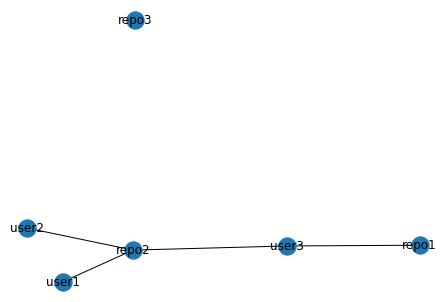

In [12]:
nx.draw(G2, with_labels = True)
plt.show()

* `user1` is connected to `repo2` and we want to recommend repositories that `user1` might be interested in working on.
* Which other users are connected to `repo2` (other than `user1`), which in this case are `user2` and `user3`
* Both `user2` and `user3` are also connected, but in this case, `user3` also has another repository, `repo1`, that it's connected to.
* In this case, we may want to thus recommend `repo1` to `user1` to contribute to.
* One thing that may come in handy for the following exercise is the idea of using **set operations** in your code.

#### Code: Node sets

In [14]:
G2.nodes(data=True)

NodeDataView({'user1': {'bipartite': 'users'}, 'user2': {'bipartite': 'users'}, 'user3': {'bipartite': 'users'}, 'repo1': {'bipartite': 'repos'}, 'repo2': {'bipartite': 'repos'}, 'repo3': {'bipartite': 'repos'}})

In [16]:
G2.edges(data=True)

EdgeDataView([('user1', 'repo2', {}), ('user2', 'repo2', {}), ('user3', 'repo1', {}), ('user3', 'repo2', {})])

* Note that the node list contains all 6 nodes, belonging to both the repositories and useres partitions, and the edge list containing the 4 edges between them.
* Suppose we wanted to see which neighbors are shared between two nodes, `user1` and `user3`

In [36]:
user1_nbrs = G2.neighbors('user1')
user1_nbrs

In [18]:
#list(user1_nbrs)

['repo2']

In [37]:
user3_nbrs = G2.neighbors('user3')
user3_nbrs

In [21]:
#list(user3_nbrs)

['repo1', 'repo2']

* To see which neighbors are shared, we can use `set` and `.intersection()`

In [32]:
set(user1_nbrs).intersection(user3_nbrs)

{'repo2'}

* Call the `intersection()` method, passing in the other container nodes, to get the common elements
* Here, the intersection of user 1 and user 3 neighbors is `repo2`; **they both contributed to `repo2`.**
* We can also get the difference between the two, which is the nodes that are in the left node set that are not in the right node set. In this case, a repo that `user3` contributed to that `user1` didn't contribute to is `repo1`
* As such, this is one candidate repository that could be recommended to `user1`

In [38]:
set(user3_nbrs).difference(user1_nbrs)

{'repo1'}

### Shared nodes in other partition
* In order to build up your concept of recommendation systems, we are going to start with the fundamentals. The focus here is on computing user similarity in bipartite graphs.
* Your job is to write a function that takes in two nodes, and returns the set of repository nodes that are shared between the two user nodes.

In [39]:
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.nodes[node1]['bipartite'] == G.nodes[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

```
# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(G, 'u7909', 'u2148')))
```

### User similarity metric
Having written a function to calculate the set of nodes that are shared between two nodes, you're now going to write a function to compute a metric of similarity between two users: the number of projects shared between two users divided by the total number of nodes in the other partition. This can then be used to find users that are similar to one another.

In [42]:
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.nodes[user1]['bipartite'] == 'users'
    assert G.nodes[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

```
# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G, 'projects')
similarity_score = user_similarity(G, 'u4560', 'u1880', 'projects')

print(similarity_score)
```

### Find similar users
You're now going to build upon what you've learned so far to write a function called most_similar_users() that finds the users most similar to another given user.

A list of nodes, `user_nodes` has been created, which contains all of the users except the given user that has been passed into the function. Your task is to complete the function such that it finds the users most similar to this given user. You'll make use of your `user_similarity()` function from the previous exercise to help do this.

A dictionary called `similarities` has been setup, in which the keys are the scores and the list of values are the nodes.

In [47]:
# from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.nodes[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

```
user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

print(most_similar_users(G, 'u4560', user_nodes, project_nodes))
```

### Recommend repositories
Here, the task is to practice using set differences, and you'll apply it to recommending repositories from a second user that the first user should contribute to.

In [48]:
def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

```
# Print the repositories to be recommended
print(recommend_repositories(G, 'u7909', 'u2148'))
```

## Chapter 2: Graph Projections
In this chapter, you will use a famous American Revolution dataset to dive deeper into exploration of bipartite graphs. Here, you will learn how to create the unipartite projection of a bipartite graph, a very useful method for simplifying a complex network for further analysis. Additionally, you will learn how to use matrices to manipulate and analyze graphs - with many computing routines optimized for matrices, you'll be able to analyze many large graphs quickly and efficiently!

### Concept of Projection
* In chapter 2, we'll explore bipartite graph projections and matrix operations.

#### Projection
* If you have a bipartite graph, it may be useful to investigate the relationship between nodes on one partition, conditioned on the connections to the nodes on the other partition.

In [49]:
# import networks as nx
G3= nx.Graph()
customers = ['customer1', 'customer2', 'customer3']
G3.add_nodes_from(customers, bipartite='customers')
products = ['product1', 'product2']
G3.add_nodes_from(products, bipartite='products')
G3.add_edge('customer1', 'product2')
G3.add_edge('customer2', 'product2')
G3.add_edge('customer3', 'product1')

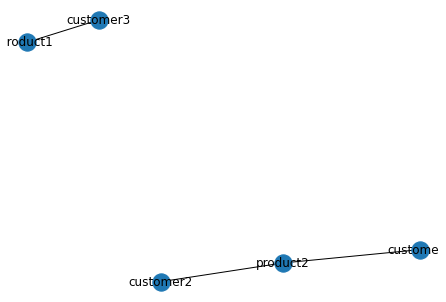

In [53]:
nx.draw(G3, with_labels = True)
plt.show()

* For example, in the Graph, `G3` (above) of customers and products, let's say we wanted to see which customers were related to one another because they were connected to the same products on the other partition
* In the above Graph, **`customer1` and `customer2` would be connected to one another on the basis of sharing a connection to `product2`.**
* `customer3`, being only connected to `product1`, which is not connectted to any other customers, would not be connected to any other customer in this graph.
* As such, the "customer" project of the bipartite graph is given by a set of 3 customer nodes, and a single edge between `customer1` and `customer2`.

#### Unipartite representation of bipartite connectivity:

In [59]:
# import networks as nx
G4= nx.Graph()
customers = ['customer1', 'customer2', 'customer3']
G4.add_nodes_from(customers)
G4.add_edge('customer1', 'customer2')

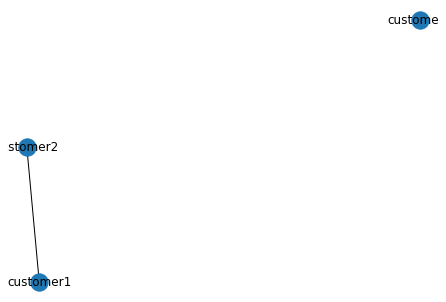

In [64]:
nx.draw(G4, with_labels = True)
plt.show()

* In the exercises that follow, we will be computing and analyzing projections of other bipartite graphs

#### Graphs on Disk
* Includes plain edge lists (without node metadata), and separate node and edge lists (each containing appropriate metadata).
    * 1) **Flat edge lists**
    * 2) **CSV files**: `nodelist + metadata`, `edgelist + metadata` 

### Reading Network Data
* NetworkX comes with **I/O functions** that allow us to read and write edgelists

#### Original text file:
`Barrett.Samuel LondonEnemies {'weight': 1}` \
`Barrett.Samuel StAndrewsLodge {'weight': 1}` \
`Marshall.Thomas LondonEnemies {'weight': 1}` \
`Eaton.Joseph TeaParty {'weight': 1}` \
`Bass.Henry LondonEnemies {'weight': 1}` 

* Space-delimited file
* First string/element of each line is the name of a person : **node**
* Second string of each line is a club: **other node that node above is connected to**
* Third string of each line encodes the metadata dictionary: **metadata dictionary.**


* NetworkX's `read_edgelist` function can digest this into a graph into memory, resulting in a graph that we can query, for, say, its edges:

```
import networkx as nx
G = nx.read_edgelist('american-revolution.txt')
```

### Bipartite projection
* Let's say we have the toy graph G4 from earlier, connecting customers to products:

In [66]:
# import networks as nx
G5= nx.Graph()
customers = ['customer1', 'customer2', 'customer3']
G5.add_nodes_from(customers, bipartite='customers')
products = ['product1', 'product2', 'product3']
G5.add_nodes_from(products, bipartite='products')
G5.add_edge('customer1', 'product2')
G5.add_edge('customer2', 'product2')
G5.add_edge('customer3', 'product1')

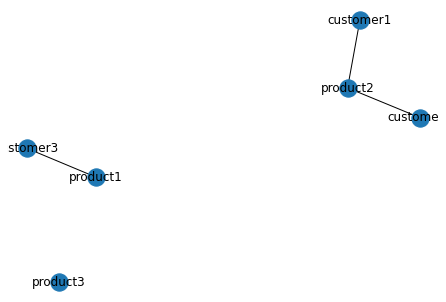

In [69]:
nx.draw(G5, with_labels = True)
plt.show()

In [71]:
G5.nodes()

NodeView(('customer1', 'customer2', 'customer3', 'product1', 'product2', 'product3'))

In [72]:
G5.edges()

EdgeView([('customer1', 'product2'), ('customer2', 'product2'), ('customer3', 'product1')])

* In order to get the customers projection, we'll first have to collect the customer nodes into a single container (say, `cust_nodes`) using a list comprehension

In [76]:
cust_nodes = [n for n in G5.nodes() if G5.nodes[n]['bipartite'] == 'customers']

In [77]:
cust_nodes

['customer1', 'customer2', 'customer3']

In [79]:
G_cust = nx.bipartite.projected_graph(G5, cust_nodes)

In [80]:
G_cust.nodes()

NodeView(('customer1', 'customer2', 'customer3'))

In [81]:
G_cust.edges()

EdgeView([('customer1', 'customer2')])

* The above code returns a graph containing only the nodes taht belong to the `customers` partition, and the edges between them (only one edge, between `customer1` and `customer2`).

#### Recall: Degree centrality
* Degree centrality = `number of neighbors` / `number of possible neighbors`
* The degree centrality metric, as defined for *bipartite graphs* is a bit different: 
    * **Denominator:** `number of nodes on opposite partition`
* This explains why we have to pass in the list of nodes from one partition into, say, the NetworkX bipartite degree centrality function (as shown below).

In [82]:
nx.bipartite.degree_centrality(G5, cust_nodes)

{'customer3': 0.3333333333333333,
 'customer1': 0.3333333333333333,
 'customer2': 0.3333333333333333,
 'product2': 0.6666666666666666,
 'product1': 0.3333333333333333,
 'product3': 0.0}

* **Note** also that the bipartite degree centrality scores may very well be different from the regular degree centrality scores in the projection, as shown above and below.

In [83]:
nx.degree_centrality(G5)

{'customer1': 0.2,
 'customer2': 0.2,
 'customer3': 0.2,
 'product1': 0.2,
 'product2': 0.4,
 'product3': 0.0}

```
# Import networkx
import networkx as nx

# Read in the data: g
G = nx.read_edgelist('american-revolution.edgelist')

# Assign nodes to 'clubs' or 'people' partitions
for n, d in G.nodes(data=True):
    if '.' in n:
        G.nodes[n]['bipartite'] = 'people'
    else:
        G.nodes[n]['bipartite'] = 'clubs'
        
# Print the edges of the graph
print(G.edges())
```

#### Computing Projection
It's now time to try your hand at computing the projection of a bipartite graph to the nodes on one of its partitions. This will help you gain practice with converting between a bipartite version of a graph and its unipartite projections. Remember from the video that the "projection" of a graph onto one of its partitions is the connectivity of the nodes in that partition conditioned on connections to nodes on the other partition. Made more concretely, you can think of the "connectivity of customers based on shared purchases".

List comprehensions can include conditions, so if you want to filter a graph for a certain type of node, you can do:

`[n for n, d in G.nodes(data=True) if d['key'] == 'some_value']`

```
# Prepare the nodelists needed for computing projections: people, clubs
# This exercise shows you two ways to do it, one with `data=True` and one without.
people = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'people']
clubs = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'clubs']

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(G, people)
clubsG = nx.bipartite.projected_graph(G, clubs)
```

#### Plot degree centrality on projection
Here, you're going to compare the degree centrality distributions for each of the following graphs: the original graph G, the people graph projection peopleG, and the clubs graph projection clubsG. This will reinforce the difference in degree centrality score computation between bipartite and unipartite versions of degree centrality metrics. The node lists people and clubs have been pre-loaded for you.

Recall from the video that the bipartite functions require passing in a container of nodes, but will return all degree centrality scores nonetheless. Remember also that degree centrality scores are stored as dictionaries (mapping node to score).

```
import matplotlib.pyplot as plt 

# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure()
original_dc = nx.bipartite.degree_centrality(G, people)
# Remember that you can directly plot dictionary values.
plt.hist(original_dc.values(), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show()


# Plot the degree centrality distribution of the peopleG graph
plt.figure()  
people_dc = nx.degree_centrality(peopleG)
plt.hist(people_dc.values())
plt.yscale('log')
plt.title('Degree centrality of people partition')
plt.show()

# Plot the degree centrality distribution of the clubsG graph
plt.figure() 
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(clubs_dc.values())
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show()
```

### Bipartite graphs as matrices
* When visualizing a graph, we can also use a **MatrixPlot**.
* With a few modifications, we can represent *bipartite* graphs as matrices as well.

#### Matrix representation
* Firstly, rather than making each row and column a single node:
    * **Each row represents one node in one partition.**
    * **Each column represents one node on the other partition.**
    * **Cells: 1 if edge present, else 0.**
    
#### How do we get the matrix representation of a bipartite graph?
Example code:

```
cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'customers']
prod_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'products']
mat = nx.bipartite.biadjacency_matrix(G,
                                      row_order = cust_nodes,
                                      column_order = prod_nodes)
mat
```

* As usual, we have to gather the nodes the nodes from each partition first. 
* We will then use the `biadjacency_matrix` function from the bipartite module.
    * It takes in two mandatory arguments: 
        * **1)** the graph, `G`
        * **2)** `row_order`, which specifies the row order of the nodes from one partition
        * **3) (optional)** `column_order` specifies the column order of the nodes from one partition
    * The `biadjacency_matrix` function will figure out, given the nodes from one partition, the complementary set of nodes from the other partition.
    * However, if you have a particular ordering, you can set it by passing in a list of nodes to the `column_order` argument.
    * What's returned is a **sparse matrix representation** of the graph

#### Matrix projection
* One thing that's really elegant about matrices is that there is a direct way to compute the projection of a graph using matrix multiplication 
    * Projection computable using matrix multiplication
* Firstly, we transpose the matrix, which is essentially swapping the rows and columns
* If we then take the bipartite graph and matrix multiplied by its transposed version, we get the projection onto the nodes that are the rows in the original matrix
* **The diagonals of the projection matrix correspond exactly to the degree of the node in the original graph**
* **The non-diagonal elements show us which nodes are connected to which other nodes, also known as the "connectivity matrix."**
* It turns out to be all-around quite elegant. 

#### How to do this in Python
* Since Python 3.5, there's a new `@` operator that allows you to take two matrices and multiply them together
    * `mat @ mat.T`
    * Above, take a sparse matrix and multiply it by its transpose, and very easily get back the projection onto the rows of the left side matrix.
    * `mat.T @ mat`
  

#### Compute adjacency matrix
Now, you'll get some practice using matrices and sparse matrix multiplication to compute projections! In this exercise, you'll use the matrix multiplication operator @ that was introduced in Python 3.5.

You'll continue working with the American Revolution graph. The two partitions of interest here are `people` and `clubs`.

```
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G, 'people')
clubs_nodes = get_nodes_from_partition(G, 'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T

print(user_matrix)
```

#### Find shared membership: Transposition
As you may have observed, you lose the metadata from a graph when you go to a sparse matrix representation. You're now going to learn how to impute the metadata back so that you can learn more about shared membership.

The `user_matrix` you computed in the previous exercise has been preloaded into your workspace.

Here, the `np.where()` function will prove useful. This is what it does: given an array, say, `a = [1, 5, 9, 5]`, if you want to get the indices where the value is equal to `5`, you can use `idxs = np.where(a == 5)`. This gives you back an array in a tuple, `(array([1, 3]),)`. To access those indices, you would want to index into the tuple as `idxs[0]`.

```
import numpy as np

# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal() 
indices = np.where(diag == diag.max())[0]  
print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')
for i in indices:
    print('- {0}'.format(people_nodes[i]))

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()

# Find pairs of users who shared membership in the most number of clubs
indices2 = np.where(users_coo.data == users_coo.data.max())[0]
print('People with most number of shared memberships:')
for idx in indices2:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]]))  
```

### Representing network data with pandas
* How to convert graphs into human-readable formats using CSV files and pandas

### CSV files for network data storage

`person,party,weight` \
`Barret.Samuel,StAndrewsLodge,1` \
`Marshall.Thomas,LondonEnemies,1` \
`Eaton.Jospeh,TeaParty,1` \
`Bass.Henry,LondonEnemies,1` \
* Above is an example of a CSV-formatted edge list. 
* Comma-delimited
* Each row is one edge
* Columns denote the nodes involved in an edge and their metadata
* Advantages:
    * Human-readable
    * Ability to interface with pandas/ Do further analysis with pandas (without having to first instantiate a Graph object)
* Disadvantages:
    * the representation may not be as compact
    * Repetetive; disk space (especially for highly connected nodes)
    
#### How to store graph data in its entirety?
* We will need two lists, which will each become its own pandas DataFrame 

#### Node list
    * Each row is one node
    * The columns represent the metadata attached to that node (including the node ID itself)
    
#### Edge list
    * Each row is one edge
    * The columns represent the metadata attached to that edge (including the IDs of the nodes of interest)
    
* Let's say we have a graph `G` with nodes and metadata attached to it, and we want to create a CSV file for the node list. 
* The key is to create a list of dictionaries, which pandas will recognize as a "record"-style format (each dictionary is one record).

```
nodelist = []
for n, d in G.nodes(data=True)
    node_data = dict()
    node_data['node'] = n
    node_data.update(d)
    nodelist.append(node_data)
```

* We start by first instantiating an empty list, say, `nodelist`
* We can then iterate over the nodes `n` and their dictionary metadata `d`.
* For every node, we create a new record dictionary `node_data` and we use one key, say `node`, to uniquely identify it by its ID.
* The important thing here is to ensure that there is no overlap with the metadata keys.
* Then, we update the record dictionary with the metadata dictionary, using `node_data.update(other_dict)`, which will take one dictionary and add in key-value pairs in the other dictionary.
* Finally, we append the node's record dict to the nodelist.
* The `nodelist` will now have been transformed into a list of dictionaries, rather than a list of tuples. 
* Once we have the data in that format, we cant then pass in the `nodelist` into a pandas `.DataFrame` constructor, yielding the pandas DataFrame of interest.
* Because the keys are identical in each dictionary, each key becomes a column, and each dictionary becomes one entry in the DataFrame, with the keys being the columns and the values being the values in each row. 

```
import pandas as pd
pd.DataFrame(nodelist)
```
* We can then save it to disk using:

```
pd.DataFrame(nodelist).to_csv('my_file.csv')
```

#### Make nodelist
You're now going to practice converting graphs to pandas representation. If you have taken any of DataCamp's pandas courses, you will know that there is a `DataFrame.to_csv('filename.csv')` method that lets you save it as a CSV file, which is a human-readable version. The main concept we hope you take away from here is the process of converting a graph to a list of records.

Start by re-familiarizing yourself with the graph data structure by calling `G.nodes(data=True)[0]` in the IPython Shell to examine one node in the graph.

```
# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in G_people.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
print(node_df.head())
```

#### Make edgelist
Now, you're going to apply the same ideas to making an edge list. Go forth and give it a shot!

As with the previous exercise, run `G.edges(data=True)[0]` in the IPython Shell to get a feel for the edge list data structure before proceeding.

```
# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in G_people.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
    
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)
print(edge_df.head())
```

## Chapter 3: Comparing graphs & time-dynamic graphs
In this chapter, you will delve into the fundamental ways that you can analyze graphs that change over time. You will explore a dataset describing messaging frequency between students, and learn how to visualize important evolving graph statistics.

### Introduction to graph differences
The analysis of evolving graphs & time series analysis.

#### Time series analysis
* How some number (or summary statistic) changes as a function. 
    * Is there an upward or downward trend?
* Rate of change of things over a sliding window of time
    * With discrete time points, that time window might be one time point and the adjacent one right after, or it might encompass a few time points at once. 
* Examples:
    * Tracking weight over time
    * Tracking stock investment portfolio value over time
    
### Evolving graphs
* Graphs that change over time: communication networks
* When analyzing evolving graphs, we can make one of two assumptions:
    * 1) Only the edges are changing over time; assume nodes stay constant
        * Easier to analyze
    * 2) Both edges and nodes change over time
    
### Graph differences
* Graph differences are an essential way to compare graphs that are changing
* Graphs are comprised of two sets:
    * A node set
    * An edge set
* If a node set doesn't change:
    * Changing only the edge set will result in a change in the graph
* We can thus use **set differences** to map out changes between two graphs in time. 
    * In comparing two sets, the left set of customers and the right set of customers (below), we want to know what items are present in the left set that are absent in the right set:
    
```
set(c1, c2, c3).difference(set(c2, c3, c4)) = set(c1)
set(c2, c3, c4).difference(set(c1, c2, c3)) = set(c4)
```
* This would be the time-series equivalent of seeing what was removed from the left timepoint set in transitioning to the right timepoint set.
* This kind of difference in **non-symmetric**.
* Graph differences operate using this **non-symmetric** difference. 
* In NetworkX: `.difference(G1, G2)` function
    * Assumes `G1` and `G2` have equal node sets
    * But that the edges might not necessarily be identical
    
#### Graph differences in Python:
* If we wanted to see which edges were added to `G1` to form `G2`:
    * `G2minusG1 = nx.difference(G2, G1)`
* If we wanted to see which edges were removed from `G1` to form `G2`: 
    * `G1minusG2 = nx.difference(G1, G2)`